# <font style = "color:rgb(50,120,229)">Data Description</font>

The file **`Bank_Personal_Loan_Modelling.csv`** contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

# <font style = "color:rgb(50,120,229)">Domain</font>
Banking

# <font style = "color:rgb(50,120,229)">Context</font>

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

# <font style = "color:rgb(50,120,229)">Attribute Information</font>

- **`ID`** : Customer ID
- **`Age`** : Customer's age in completed years
- **`Experience`** : #years of professional experience
- **`Income`** : Annual income of the customer
- **`ZIP Code`** : Home Address ZIP code.
- **`Family`** : Family size of the customer
- **`CCAvg`** : Avg. spending on credit cards per month
- **`Education`** : Education Level. **1**: Undergrad; **2**: Graduate; **3**: Advanced/Professional
- **`Mortgage`** : Value of house mortgage if any. ($000)
- **`Personal Loan`** : Did this customer accept the personal loan offered in the last campaign?
- **`Securities Account`** : Does the customer have a securities account with the bank?
- **`CD Account`** : Does the customer have a certificate of deposit (CD) account with the bank?
- **`Online`** : Does the customer use internet banking facilities?
- **`CreditCard`** : Does the customer use a credit card issued by `UniversalBank`?

# <font style = "color:rgb(50,120,229)">Learning Outcomes</font>

- Exploratory Data Analysis
- Preparing the data to train a model
- Training and making predictions using a classification model
- Model evaluation

# <font style = "color:rgb(50,120,229)">Objective</font>

The classification goal is to predict the likelihood of a liability customer buying personal
loans.

# <font style = "color:rgb(50,120,229)">Steps and tasks</font>

1. Read the column description and ensure you understand each attribute well
2. Study the data distribution in each attribute, share your findings
3. Get the target column distribution. Your comments
4. Split the data into training and test set in the ratio of 70:30 respectively
5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans
6. Print the confusion matrix for all the above models
7. Give your reasoning on which is the best model in this case and why it performs better?

# <font style = "color:rgb(50,120,229)">References</font>
1. [Data analytics use cases in Banking](https://activewizards.com/blog/top-9-data-science-use-cases-in-banking/)
2. [Machine Learning for Financial Marketing](https://thefinancialbrand.com/71350/ai-machine-learning-analytics-marketing-banking-trends/)

### <font style = "color:rgb(8,133,37)">Step 0: Import Modules</font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [148]:
# Supress warnings
import warnings
warnings.filterwarnings("ignore")

### <font style = "color:rgb(8,133,37)">Step 1: Read data from file</font>

In [2]:
bankData = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
bankData.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


We can refer to [Attribute Information](#Attribute-Information) to understand the meaning of each column.

**Key Findings**

1. Since every user is going to have a separate `ID`, it's not going to add any significant value to the model, so we can remove that.
2. Age can provide us information regarding the likelihood of a user accepting the personal loan based on the age group he/she lies in.
3. We can get similar information based on Experience, Income, etc.
4. ZIP Code can give information regarding the effect of the personal loan on the likelihood of a person opting for personal loan.
5. Education, because it has 3 levels, serves as a categorical variable and provides information regarding the education of the user.
6. Personal Loan, Securities Account, CD Account, Online and CredictCard are also categorical variables with only 2 levels and provide the relevant user attributes.
7. All the columns except **`ID`** and **`Personal Loan`** can be used as independent variables.
8. The target variable/column is **`Personal Loan`**.

### <font style = "color:rgb(8,133,37)">Step 2: Study the data distribution</font>

In [10]:
bankData.shape

(5000, 14)

In [12]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


As we can see, there are no null values in the data. Also, the data types of the variables are already correct so we won't have to change the data types.

In [16]:
bankData.describe(percentiles=[0.10,0.25,0.50,0.75,0.90]).T

,count,mean,std,min,10%,25%,50%,75%,90%,max
ID,5000.0,2500.500000,1443.520003,1.0,500.9,1250.75,2500.5,3750.25,4500.1,5000.0
Age,5000.0,45.338400,11.463166,23.0,30.0,35.00,45.0,55.00,61.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,4.0,10.00,20.0,30.00,36.0,43.0
Income,5000.0,73.774200,46.033729,8.0,22.0,39.00,64.0,98.00,145.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,90275.0,91911.00,93437.0,94608.00,95138.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,1.00,2.0,3.00,4.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.3,0.70,1.5,2.50,4.3,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,1.00,2.0,3.00,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.00,0.0,101.00,200.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.00,0.0,0.00,0.0,1.0


If we refer to the distribution above, we can come up with the following findings:

1. `Income` variable has some potential outliers on the higher end and the lower end. This can be seen because of the sudden jump in `min` and `10%` percentile. Similar jump is present in `75%` and `90%` and between `90%` and `max`.
2. `ZIP Code` being a **nominal variable**, the description doesn't convey any meaning.
3. `CCAvg` has some potential outliers on the higher end. This can be seen because of a sudden jump between `90%` and `max` value.
4. `Mortgage` description shows that at least 50% entries don't have any mortgage. There's also a potential outlier on the higher end. This can be seen because of the sudden jump in `90%` and `max` value.

In [18]:
bankData.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

The number of unique elements for `Family`, `Education`, `Personal Loan`, `Securities Account`, `CD Account`, `Online` and `CreditCard` variables show that they are categorical variables.

### <font style = "color:rgb(8,133,37)">Step 2.1: Unilateral Analysis</font>

Next, let's start carrying out **Unilateral Analysis**.

In [30]:
def unilateralAnalysis(variable, categorical=False):
    # For categorical attributes, plot a countplot
    if categorical:
        sns.countplot(bankData[variable])
        plt.show()
    else:
        plt.subplot(2,1,1)
        # Distribution Plot
        sns.distplot(bankData[variable])
        plt.subplot(2,1,2)
        # Boxplot
        sns.boxplot(bankData[variable])
        plt.show()
        print("Mean: {:.2f}".format(bankData[variable].mean()))

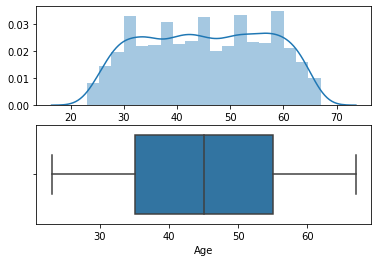

Mean: 45.34


In [31]:
unilateralAnalysis("Age")

Age follows an approximately normal distribution. The mean and median are same.

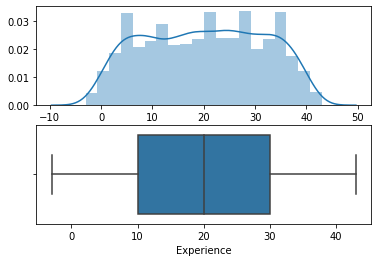

Mean: 20.10


In [32]:
unilateralAnalysis("Experience")

Experience also follows an approximately normal distribution. Also note that there are some entries with negative experience which should be removed.

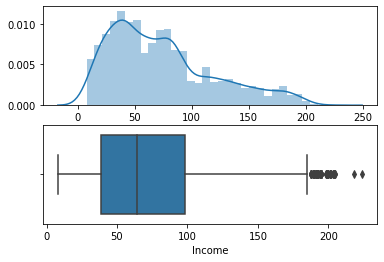

Mean: 73.77


In [33]:
unilateralAnalysis("Income")

As we had mentioned before, Income has some outliers which need to be removed. Also, it can be seen that Income is positively skewed (Mean is greater than median).

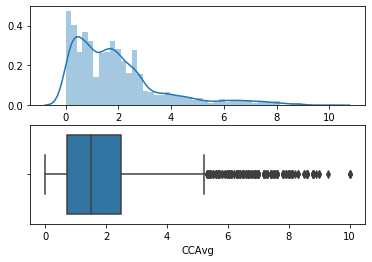

Mean: 1.94


In [35]:
unilateralAnalysis("CCAvg")

CCAvg is also positively skewed and has some outliers that can be removed.

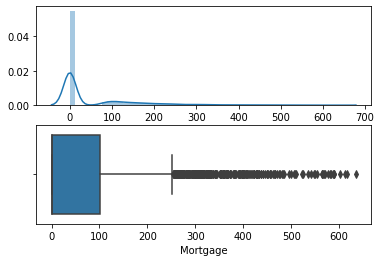

Mean: 56.50


In [36]:
unilateralAnalysis("Mortgage")

As can be seen from the above plots, majority of customers don't have a mortgage and the maximum mortgage is very high and can be removed.

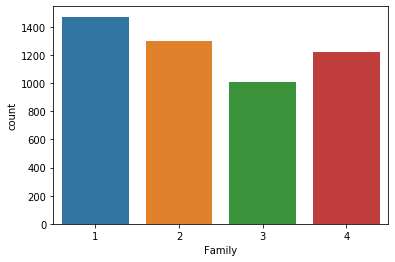

In [34]:
unilateralAnalysis("Family",True)

Family variable is evenly distributed.

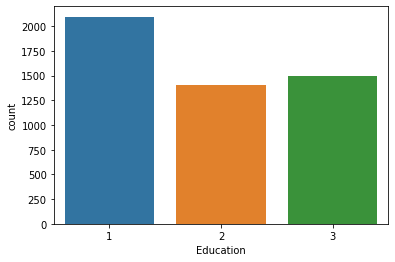

In [41]:
unilateralAnalysis("Education",True)

The data for Education is evenly distributed to a large extent. Most customers hold an unergrad level education.

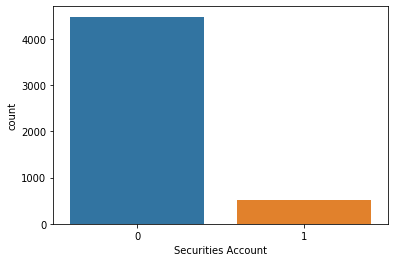

In [37]:
unilateralAnalysis("Securities Account",True)

The data for Securities Account is unevenly distributed. Most people don't have a Securities Account.

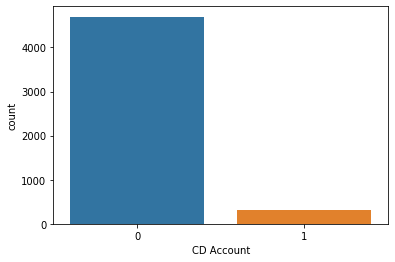

In [38]:
unilateralAnalysis("CD Account", True)

CD Account data is also unevenly distributed. Most people don't have a CD Account.

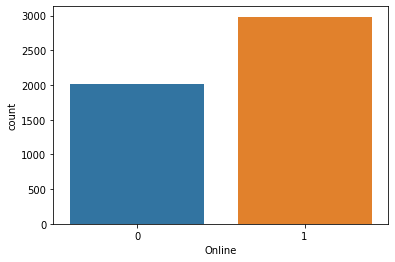

In [39]:
unilateralAnalysis("Online",True)

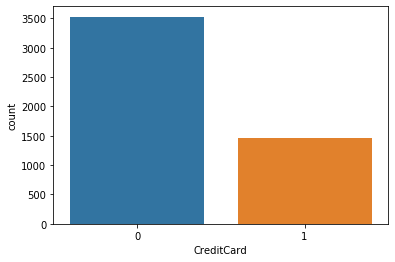

In [40]:
unilateralAnalysis("CreditCard",True)

For both Online and CreditCard, the data is slightly unevenly distributed.

### <font style = "color:rgb(8,133,37)">Step 2.2: Data Cleaning</font>

Now that we have performed unilateral analysis, let's perform some data cleaning based on our findings.

We will start off with treating the negative experience entries.

In [42]:
sum(bankData["Experience"]<0)

52

In [44]:
sum(bankData["Experience"]<0)/len(bankData.index) * 100

1.04

This means that 1.04% entries have negative experience. There are 2 main ways of treating with this data.

1. We can remove these entries. Since it's just 1.04%, we won't be losing any major amount of data.
2. We can replace these experience values with a different value.

Before we make the decision, let's have a look at the experience values.

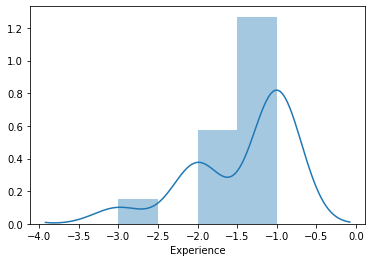

In [48]:
sns.distplot(bankData[bankData["Experience"] < 0]["Experience"])

In [49]:
bankData[bankData["Experience"]<0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [50]:
bankData["Experience"].median()

20.0

Instead of removing the data, it can be assumed that this was an error in manual entry of data because all the 52 entries have a stable income and a good education. If we replace these values with the median entry of 20 years, it will create a huge difference in the **magnitude** of experience for these values. That's why, I will replace these values with their magnitudes assuming that there was some error in entry. Since it's just 5000 entries of data, I don't want to lose any data unless until absolutely necessary.

In [51]:
bankData["Experience"] = bankData["Experience"].apply(lambda x: abs(x))

In [52]:
sum(bankData["Experience"] < 0)

0

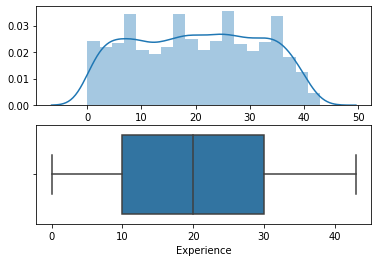

Mean: 20.13


In [53]:
unilateralAnalysis("Experience")

In [54]:
bankData["Experience"].median()

20.0

Good thing to note is that there is no significant change change in mean, median and distribution of Experience and we can safely continue using these values for model building.

### <font style = "color:rgb(8,133,37)">Step 2.3: Further Analysis</font>

Now that we have went over the distribution of each variable, let's continue to understand the effect they have on the target variable and their relationship between each other.

In [69]:
def furtherAnalysisCategorical(variable, countplot=False, variable2 = None):
    if countplot:
        sns.countplot(x=variable,data=bankData,hue='Personal Loan')
        plt.show()
    else:
        # Boxplot
        sns.boxplot(x=variable,y=variable2,hue='Personal Loan',data=bankData)
        plt.show()

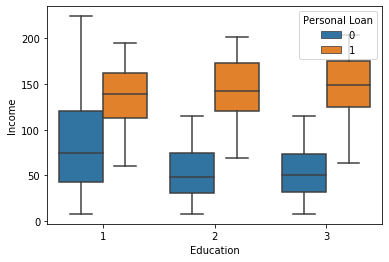

In [70]:
furtherAnalysisCategorical("Education",False,"Income")

Note that as expected, people with higher income tend to go for the personal loan. The difference is larger as the education level increases from 1 to 3. Also note that the income levels for the people who opted for the loan have a similar income spread irrespective of their education level.

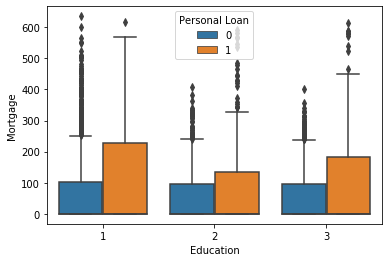

In [71]:
furtherAnalysisCategorical("Education",False,"Mortgage")

As expected, people with higher mortgage tend to go for a personal loan. The reason can be so that they can pay back the mortgage.

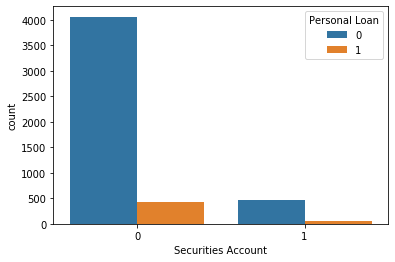

In [72]:
furtherAnalysisCategorical("Securities Account",True)

Compared to customers having a personal loan, more of those who don't have a personal loan have a securities account. But, the customers having a securities account is very low irrespective of whether they have taken a personal loan or not.

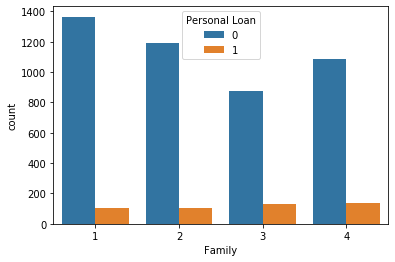

In [73]:
furtherAnalysisCategorical("Family",True)

Number of family members doesn't seem to have any significant effect on the number of customers who opted for personal loan. But, if we focus on the ratio of people who didn't opt for the loan and those who opted for the loan, customers with family size 3 are most likely to opt for the loan.

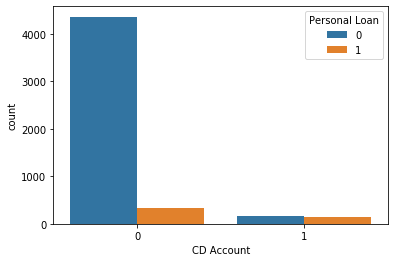

In [74]:
furtherAnalysisCategorical("CD Account",True)

Almost all customers who have a CD Account have a personal loan whereas if a customer doesn't have a CD Account, the likelihood of the customer have a personal loan is very low.

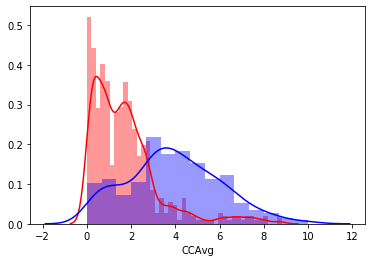

In [77]:
sns.distplot( bankData[bankData["Personal Loan"] == 0]['CCAvg'], color='r')
sns.distplot( bankData[bankData["Personal Loan"] == 1]['CCAvg'], color='b')

Customers with higher credit card average have a higher likelihood of having a personal loan. This can also be understood because a credit card is similar to a personal loan (one with a very short tenure) to a large extent. So if a customer is spending higher amount of money with a credit card, they have a higher chance to opt for a personal loan and pay the amount back later.

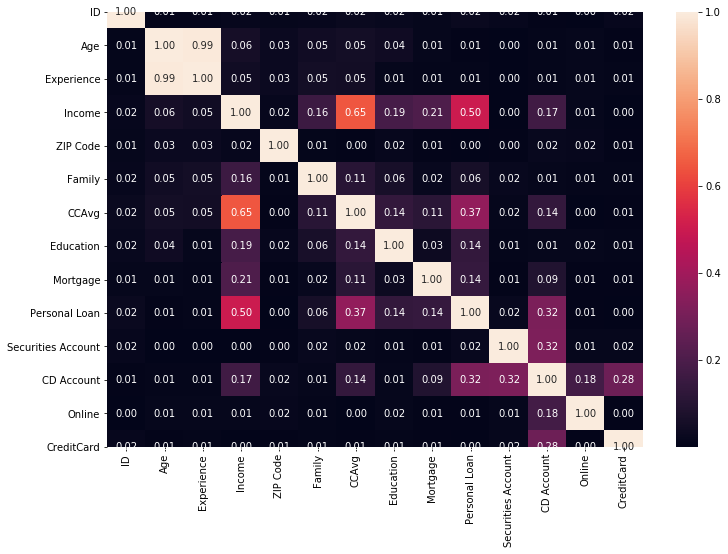

In [82]:
# Heatmap of ABSOLUTE values of correlation
plt.figure(figsize=(12,8))
sns.heatmap(np.abs(bankData.corr()), annot=True, fmt=".2f")
plt.show()

From the heatmap of absolute values of correlation, we can see that **`Income`** and **`CC Avg`** are moderately correlated (corr = 0.65), **`Age`** and **`Experience`** are highly correlated.

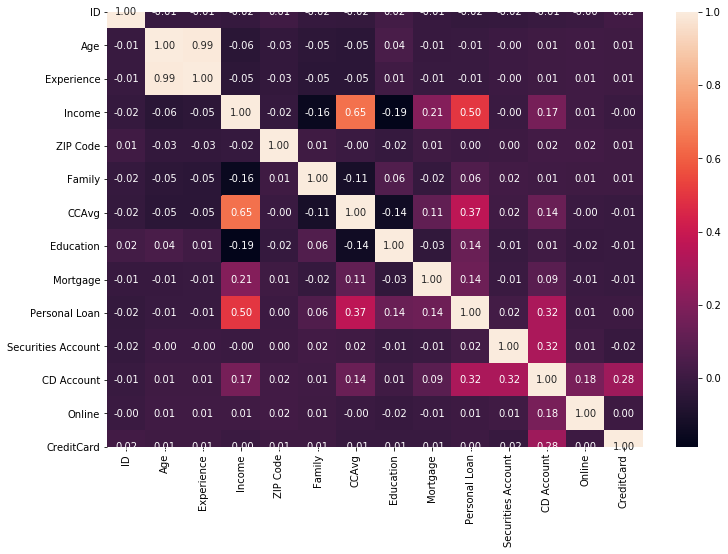

In [81]:
plt.figure(figsize=(12,8))
sns.heatmap(bankData.corr(), annot=True, fmt=".2f")
plt.show()

From the above heatmap, we can see that both **`Age`**, **`Experience`** and **`Income`**, **`CC Avg`** have a positive correlation.

I will drop **`Experience`** variable.

### <font style = "color:rgb(8,133,37)">Step 3: Split the data into train and test</font>

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
# We want a 70:30 split
# Specify a random state so that the results can be generated again
train, test = train_test_split(bankData.drop(['ID','Experience'], axis=1), test_size=0.3 , random_state=42)

In [85]:
X_train = train.drop("Personal Loan",axis=1)
y_train = train["Personal Loan"]
X_test = test.drop("Personal Loan",axis=1)
y_test = test["Personal Loan"]

In [86]:
X_train.shape, X_test.shape

((3500, 11), (1500, 11))

In [87]:
y_train.shape, y_test.shape

((3500,), (1500,))

Let's also normalize the values.

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
scaler = StandardScaler()

In [90]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### <font style = "color:rgb(8,133,37)">Step 4: Model Building</font>

### <font style = "color:rgb(8,133,37)">Step 4.1: Logistic Regression</font>

In [91]:
from sklearn.linear_model import LogisticRegression

In [115]:
from sklearn.metrics import confusion_matrix, classification_report

In [92]:
lr = LogisticRegression()

In [93]:
lr.fit(X_train, y_train)

/home/hp/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
score = lr.score(X_test, y_test)

In [95]:
score

0.952

We obtained an accuracy of 95.2% on test set.

In [96]:
score = lr.score(X_train, y_train)
score

0.9528571428571428

And a similar accuracy on the train set. So we know that the model didn't overfit the data.

In [114]:
confusion_matrix(y_test, lr.predict(X_test))

array([[1325,   18],
       [  54,  103]])

In [117]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1343
           1       0.85      0.66      0.74       157

    accuracy                           0.95      1500
   macro avg       0.91      0.82      0.86      1500
weighted avg       0.95      0.95      0.95      1500



### <font style = "color:rgb(8,133,37)">Step 4.2: K-NN Classifier</font>

In [97]:
from sklearn.neighbors import KNeighborsClassifier

In [101]:
from sklearn.metrics import accuracy_score

In [118]:
knn = KNeighborsClassifier(n_neighbors=5)

In [119]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [120]:
y_pred = knn.predict(X_test)
acc = accuracy_score(y_pred, y_test)
acc

0.9546666666666667

In [121]:
y_pred = knn.predict(X_train)
acc = accuracy_score(y_pred, y_train)
acc

0.9682857142857143

We obtain 96.83% accuracy on train data and 95.47% accuracy on test data using kNN classifier with n=5. 

Let's use the Elbow Method to obtain the n_neighbors value

In [111]:
test_accuracies = []
train_accuracies = []
# Might take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    acc = accuracy_score(pred_i, y_test)
    test_accuracies.append(acc)
    pred_i = knn.predict(X_train)
    acc = accuracy_score(pred_i, y_train)
    train_accuracies.append(acc)

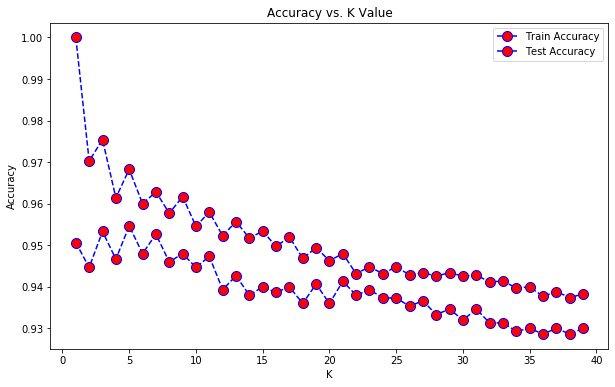

In [112]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),train_accuracies,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10, label="Train Accuracy")
plt.plot(range(1,40),test_accuracies,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10, label="Test Accuracy")
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

As we can see from the graph above, we can continue using the initial choice of n_neighbors = 5

In [122]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [123]:
confusion_matrix(y_test, knn.predict(X_test))

array([[1337,    6],
       [  62,   95]])

In [124]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1343
           1       0.94      0.61      0.74       157

    accuracy                           0.95      1500
   macro avg       0.95      0.80      0.86      1500
weighted avg       0.95      0.95      0.95      1500



### <font style = "color:rgb(8,133,37)">Step 4.3: Naive Bayes</font>

In [125]:
from sklearn.naive_bayes import GaussianNB

In [126]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [130]:
y_pred = nb.predict(X_test)

In [135]:
nb.score(y_test.values.reshape(-1,1), y_pred.reshape(-1,1))

0.8726666666666667

In [136]:
y_pred = nb.predict(X_train)
nb.score(y_train.values.reshape(-1,1), y_pred.reshape(-1,1))

0.8682857142857143

We obtained an accuracy of 86.83% on training set and 87.27% on testing set.

In [137]:
confusion_matrix(y_test, nb.predict(X_test))

array([[1245,   98],
       [  64,   93]])

In [138]:
print(classification_report(y_test, nb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1343
           1       0.49      0.59      0.53       157

    accuracy                           0.89      1500
   macro avg       0.72      0.76      0.74      1500
weighted avg       0.90      0.89      0.90      1500



### <font style = "color:rgb(8,133,37)">Step 5: Model Comparison</font>

For final model comparison, we will use Cross Validation score.

In [139]:
from sklearn.model_selection import KFold, cross_val_score

In [152]:
models = [lr, knn, nb]
model_names = ["Logistic Regression", "K-NN Classifier", "Naive Bayes"]
results = []
kfold = KFold(n_splits = 10, random_state=42)

In [153]:
X = bankData.drop(["ID","Experience","Personal Loan"],axis=1)

In [154]:
y = bankData["Personal Loan"]

In [155]:
for model,model_name in zip(models, model_names):
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring = "accuracy")
    results.append(cv_results)
    print("Model: {}, Mean Accuracy: {}, Std: {}".format(model_name, cv_results.mean(), cv_results.std()))

Model: Logistic Regression, Mean Accuracy: 0.9082000000000001, Std: 0.007871467461661777
Model: K-NN Classifier, Mean Accuracy: 0.8986000000000001, Std: 0.008901685233707162
Model: Naive Bayes, Mean Accuracy: 0.8855999999999999, Std: 0.010384603988597745


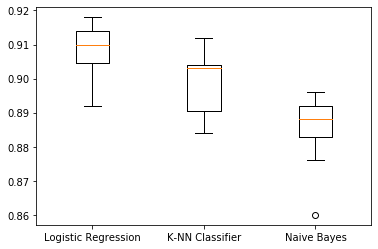

In [156]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(model_names)
plt.show()

As we can see from the box plot above, **Logistic Regression** is the best model followed by K-NN Classifier and finally the Naive Bayes model.

Logistic Regression works best when there is a linearity in the model and the classes are cleanly distributed. As we saw in Steps 1 and 2, the target variable's dependence on the variables can be simply explained based on the values of the independent variables. In such a case, the decision tree classifier (CART) will also give a very good result which can be easily verified as shown below.

In [157]:
from sklearn.tree import DecisionTreeClassifier

In [158]:
dt=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [159]:
dt.score(X_test , y_test)

0.9826666666666667

In [160]:
dt.score(X_train, y_train)

0.9785714285714285

As we see, the Decision Tree classifier was able to obtain an accuracy of 98.27% on testing set and 97.86% on training set.